### Importing Libraries used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as sci
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api
import numpy as np
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
sns.set(rc = {'figure.figsize':(12,5)})

### Reading the Dataset

In [3]:
data=pd.read_csv('train.csv')
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K
5,24,Private,274505,Bachelors,12,Never-married,Prof-specialty,Own-child,White,Female,2,0,40,United-States,<=50K
6,40,Private,80789,HS-grad,8,Married-civ-spouse,Adm-clerical,Wife,White,Female,13,0,35,United-States,>50K
7,42,Federal-gov,243759,Some-college,10,Divorced,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,18,0,39,Cuba,>50K
8,37,Private,67638,Bachelors,12,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,4,0,39,Philippines,>50K
9,52,Self-emp-not-inc,130237,HS-grad,8,Married-civ-spouse,Sales,Husband,White,Male,0,1,55,Mexico,<=50K


### Summary Statistics and Dataframe Properties

In [4]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [5]:
print(data.shape)

(18944, 15)


In [6]:
print(data.describe())

                age         fnlwgt  education-num  capital-gain  capital-loss  \
count  18944.000000   18944.000000   18944.000000  18944.000000  18944.000000   
mean      39.266470  164292.035156       9.479043    577.476510     33.082823   
std       13.395878   93425.986084       2.830047   2414.473217    248.521486   
min       14.000000    8019.000000       2.000000    -58.000000     -2.000000   
25%       28.000000   98530.750000       8.000000     -5.000000      0.000000   
50%       40.000000  152895.500000       9.000000      5.000000      0.000000   
75%       47.000000  215541.000000      12.000000     17.000000      0.000000   
max       99.000000  772988.000000      16.000000  16193.000000   2437.000000   

       hours-per-week  
count    18944.000000  
mean        40.119299  
std         11.124649  
min          1.000000  
25%         35.000000  
50%         39.000000  
75%         44.000000  
max        102.000000  


### Checking for Null Values

In [7]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [8]:
print(data.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Exploratory Data Analysis

In [9]:
for col in data.columns:
    if data[col].dtypes==object:
        print(col,data[col].unique())
        print("-----------------------------------------------------------------")

workclass [' Private' ' Self-emp-not-inc' ' State-gov' ' Self-emp-inc'
 ' Federal-gov' ' Local-gov' ' Never-worked' ' Without-pay']
-----------------------------------------------------------------
education [' HS-grad' ' Bachelors' ' Masters' ' Some-college' ' 7th-8th'
 ' Doctorate' ' Prof-school' ' Assoc-voc' ' Assoc-acdm' ' 5th-6th' ' 11th'
 ' 9th' ' 1st-4th' ' 12th' ' 10th' ' Preschool']
-----------------------------------------------------------------
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
-----------------------------------------------------------------
occupation [' Other-service' ' Sales' ' Transport-moving' ' Prof-specialty'
 ' Exec-managerial' ' Adm-clerical' ' Handlers-cleaners'
 ' Farming-fishing' ' Craft-repair' ' Protective-serv'
 ' Machine-op-inspct' ' Tech-support' ' Priv-house-serv' ' Armed-Forces']
-----------------------------------------------------------------
relati

In [10]:
for col in data.columns:
    if data[col].dtypes==object:
        print(col)
        print(data[col].value_counts())
        print("-------------------------------------------------------------------------")

workclass
 Private             11700
 Self-emp-not-inc     3089
 Local-gov            1159
 Federal-gov           995
 Self-emp-inc          861
 State-gov             819
 Without-pay           258
 Never-worked           63
Name: workclass, dtype: int64
-------------------------------------------------------------------------
education
 HS-grad         5462
 Some-college    3745
 Bachelors       3337
 11th            1000
 Masters          941
 Assoc-acdm       796
 Assoc-voc        769
 7th-8th          750
 Prof-school      476
 Doctorate        387
 10th             386
 5th-6th          319
 9th              200
 12th             184
 1st-4th          148
 Preschool         44
Name: education, dtype: int64
-------------------------------------------------------------------------
marital-status
 Married-civ-spouse       8311
 Never-married            5857
 Divorced                 2697
 Separated                 772
 Widowed                   624
 Married-spouse-absent     461
 Ma

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

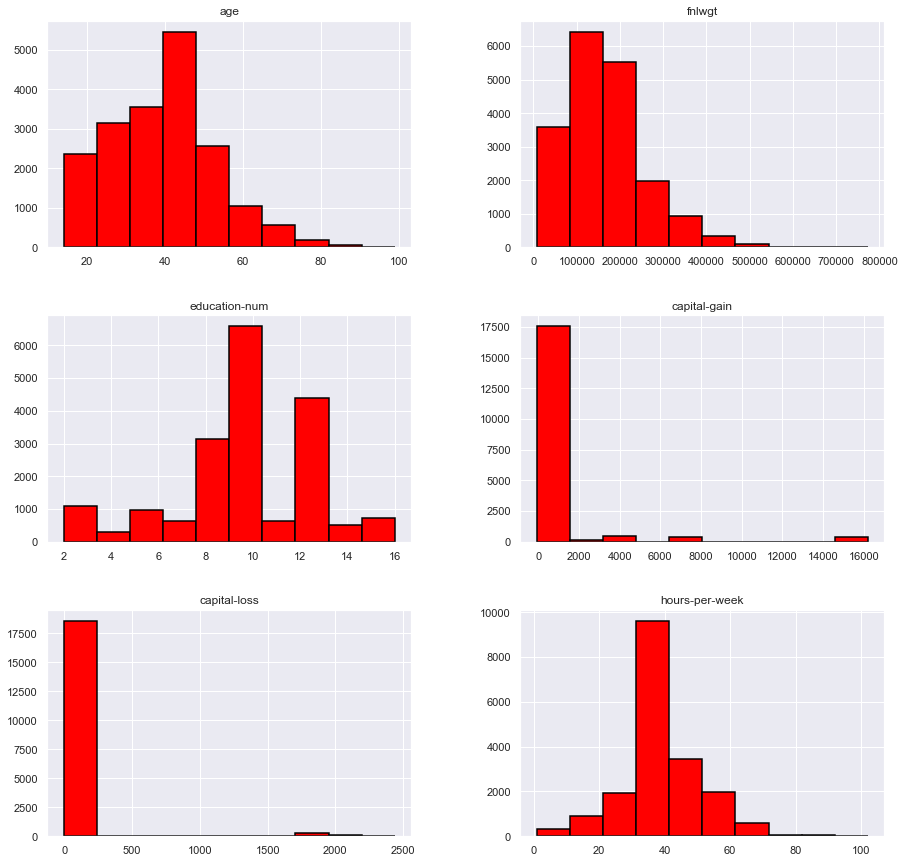

In [11]:
data.hist(figsize=(15,15),linewidth=1.5,edgecolor='black',color='red')

In [12]:
for col in data.columns:
    if data[col].dtypes==object:
        print(data.groupby([col])['hours-per-week'].mean())
        print("--------------------------------------------------------------------")

workclass
 Federal-gov         40.289447
 Local-gov           40.437446
 Never-worked        41.761905
 Private             38.362821
 Self-emp-inc        46.083624
 Self-emp-not-inc    45.182907
 State-gov           39.225885
 Without-pay         39.593023
Name: hours-per-week, dtype: float64
--------------------------------------------------------------------
education
 10th            38.266839
 11th            33.798000
 12th            39.576087
 1st-4th         39.472973
 5th-6th         37.304075
 7th-8th         39.386667
 9th             39.575000
 Assoc-acdm      42.640704
 Assoc-voc       40.431730
 Bachelors       43.956248
 Doctorate       47.031008
 HS-grad         39.008788
 Masters         43.543039
 Preschool       39.977273
 Prof-school     49.945378
 Some-college    37.244860
Name: hours-per-week, dtype: float64
--------------------------------------------------------------------
marital-status
 Divorced                 38.838339
 Married-AF-spouse        33.180180
 

<AxesSubplot:title={'center':'Income class Vs Avg Working time'}, xlabel='income,workclass', ylabel='Avg Working time per week'>

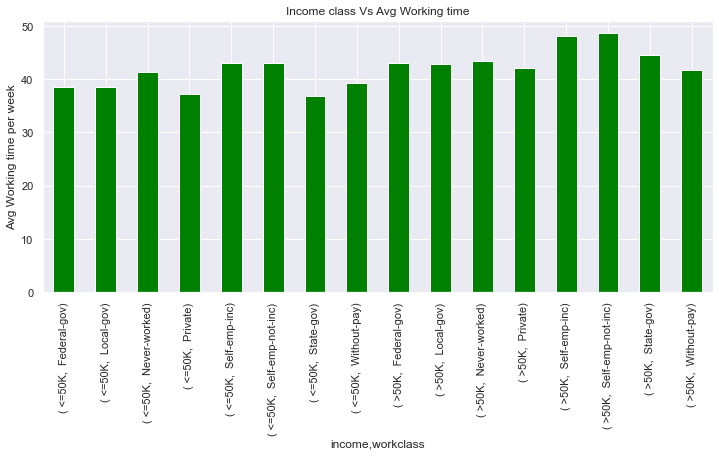

In [13]:
data.groupby(['income','workclass'])['hours-per-week'].mean().plot(kind='bar',title='Income class Vs Avg Working time',ylabel='Avg Working time per week',color='green')

<AxesSubplot:title={'center':'Native Country Vs Avg Working time'}, xlabel='native-country', ylabel='Avg Working time per week'>

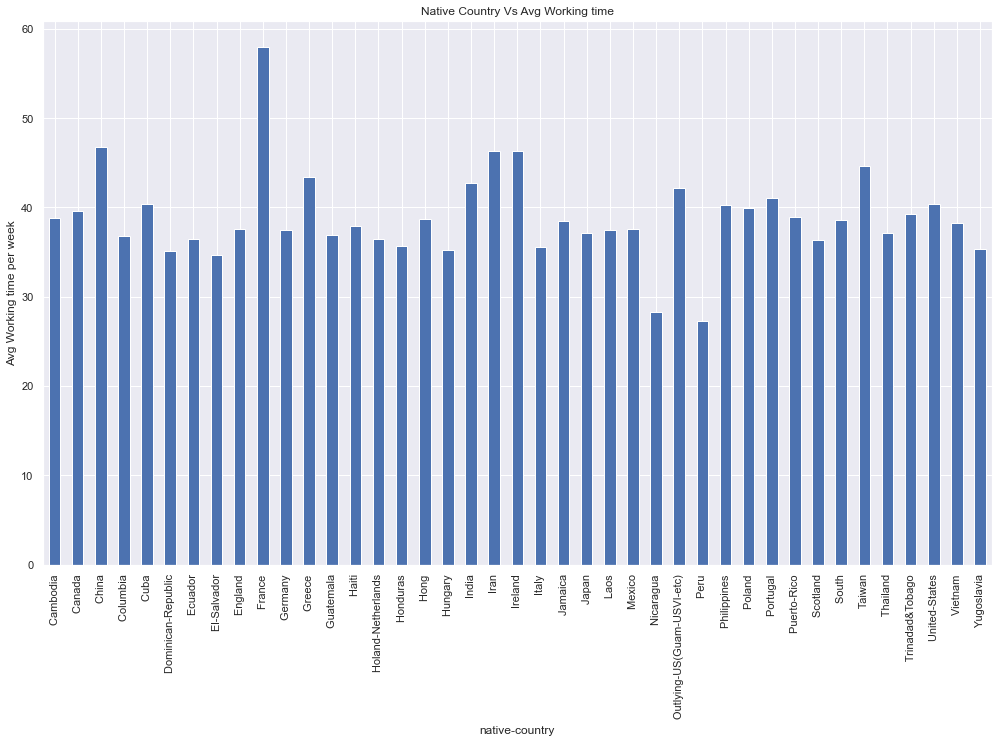

In [14]:
data.groupby(['native-country'])['hours-per-week'].mean().plot(kind='bar',figsize=(17,10),title='Native Country Vs Avg Working time',ylabel='Avg Working time per week')

<AxesSubplot:title={'center':'Race Vs Avg Working time'}, xlabel='race', ylabel='Avg Working time per week'>

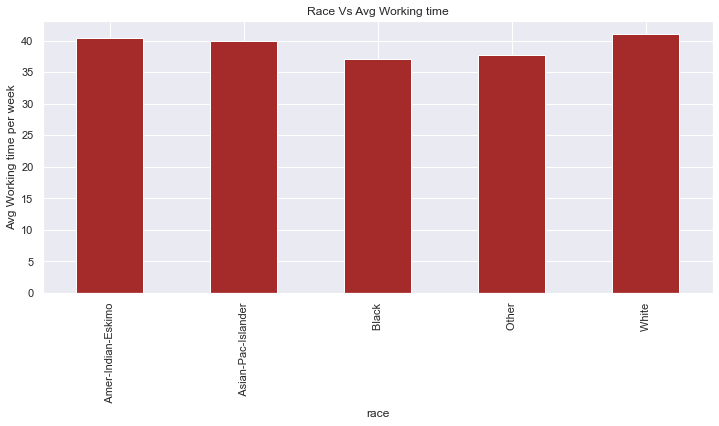

In [15]:
data.groupby(['race'])['hours-per-week'].mean().plot(kind='bar',title='Race Vs Avg Working time',ylabel='Avg Working time per week',color='brown')

<AxesSubplot:title={'center':'Gender Vs Avg Working time'}, ylabel='hours-per-week'>

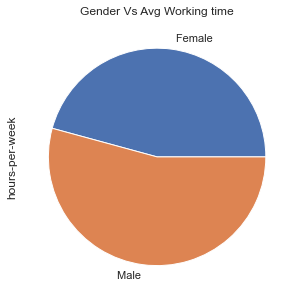

In [16]:
data.groupby(['sex'])['hours-per-week'].mean().plot(kind='pie',title='Gender Vs Avg Working time')

<AxesSubplot:title={'center':'Age Vs Avg Working Hours Per week'}, xlabel='age', ylabel='Avg Working Hours Per week'>

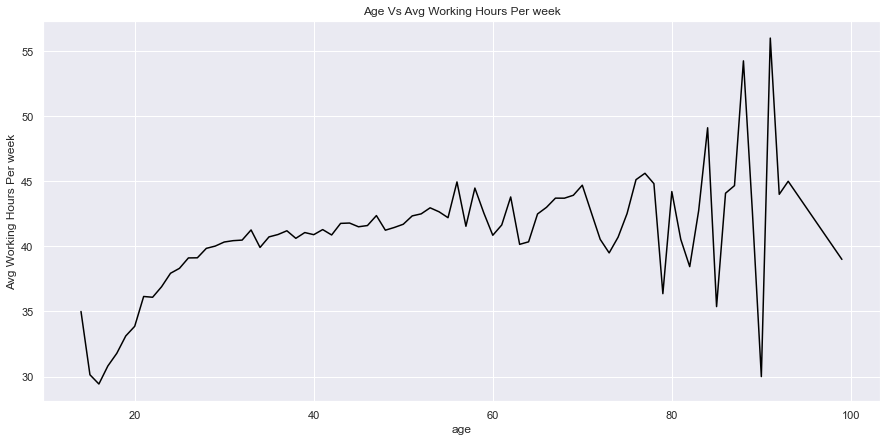

In [17]:
data.groupby(['age'])['hours-per-week'].mean().plot(kind='line',figsize=(15,7),ylabel='Avg Working Hours Per week',title='Age Vs Avg Working Hours Per week',color='black')

<AxesSubplot:title={'center':'Relationship Vs Avg Working time'}, xlabel='relationship', ylabel='Avg Working time per week'>

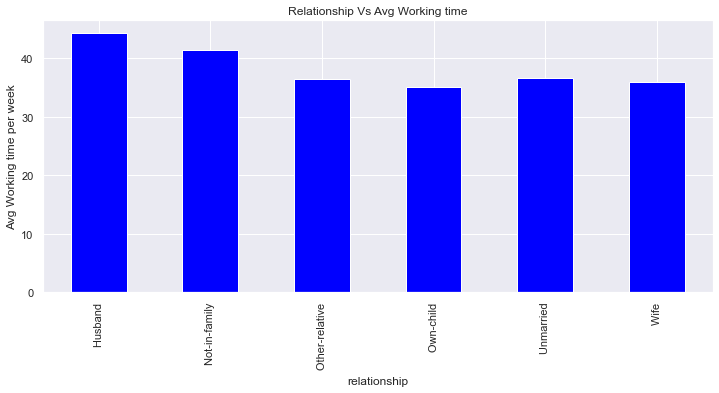

In [18]:
data.groupby(['relationship'])['hours-per-week'].mean().plot(kind='bar',title='Relationship Vs Avg Working time',ylabel='Avg Working time per week',color='blue')

<AxesSubplot:title={'center':'Marital Status Vs Avg Working time'}, ylabel='hours-per-week'>

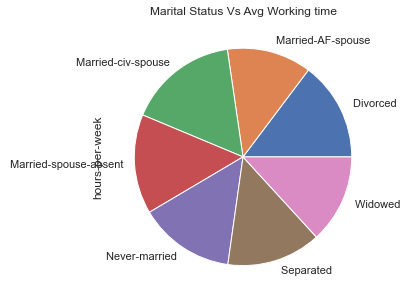

In [19]:
data.groupby(['marital-status'])['hours-per-week'].mean().plot(kind='pie',title='Marital Status Vs Avg Working time')

<AxesSubplot:title={'center':'Workclass Vs Avg Working time'}, xlabel='workclass', ylabel='Avg Working time per week'>

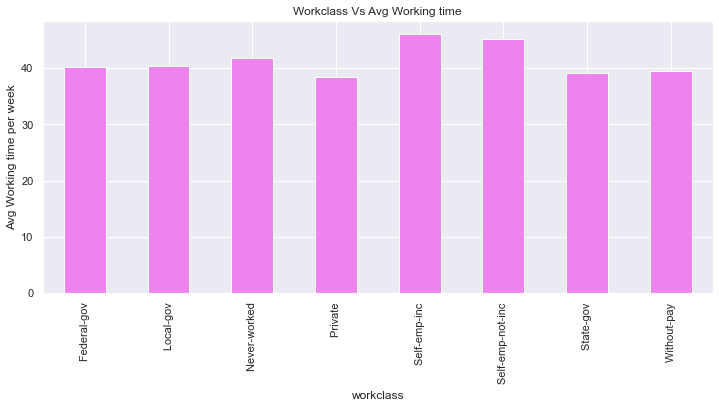

In [20]:
data.groupby(['workclass'])['hours-per-week'].mean().plot(kind='bar',title='Workclass Vs Avg Working time',ylabel='Avg Working time per week',color='violet')

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

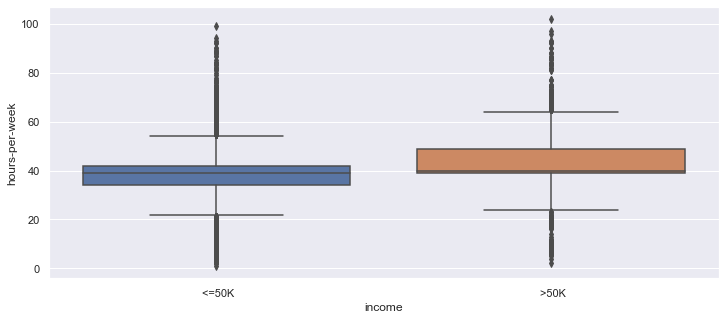

In [21]:
sns.boxplot(x='income',y='hours-per-week',data=data)

<AxesSubplot:xlabel='workclass', ylabel='hours-per-week'>

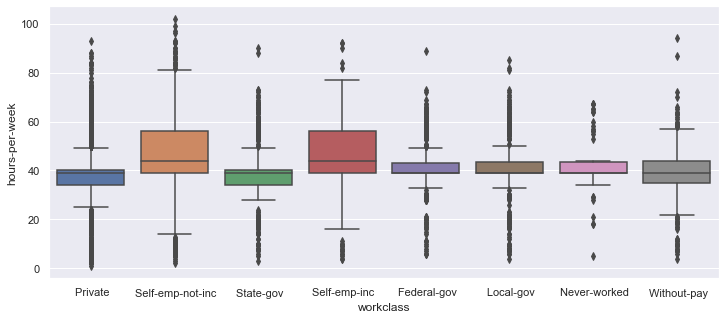

In [22]:
sns.boxplot(x='workclass',y='hours-per-week',data=data)

<AxesSubplot:xlabel='occupation', ylabel='hours-per-week'>

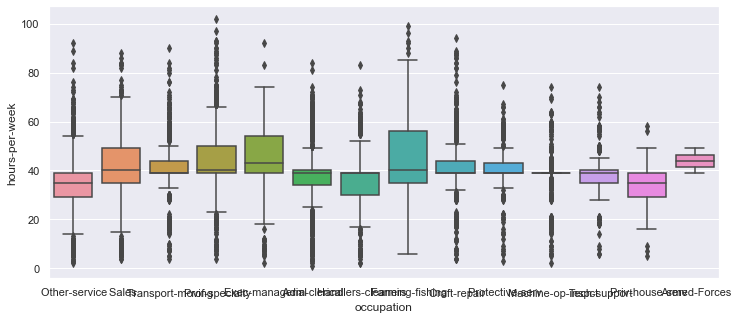

In [23]:
sns.boxplot(x='occupation',y='hours-per-week',data=data)

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

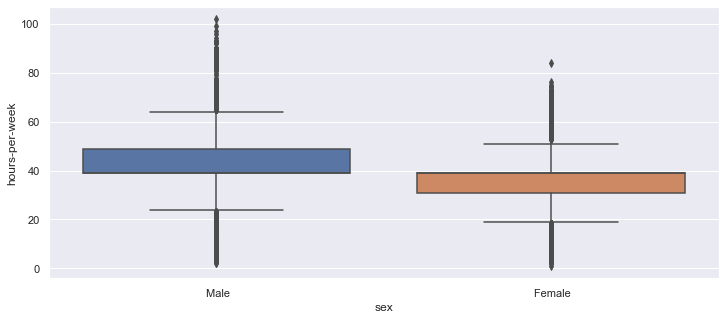

In [24]:
sns.boxplot(x='sex',y='hours-per-week',data=data)

<AxesSubplot:xlabel='race', ylabel='hours-per-week'>

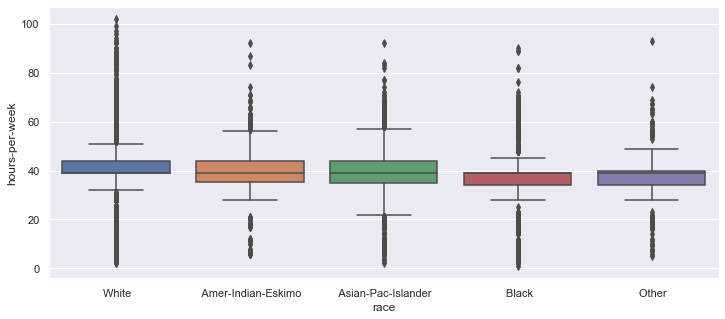

In [25]:
sns.boxplot(x='race',y='hours-per-week',data=data)

In [26]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(include=np.object)

In [27]:
z_scores = sci.zscore(num_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
num_data = num_data[filtered_entries]
cat_data=cat_data[filtered_entries]

In [37]:
cat_data.isnull().sum,num_data.shape

((17722, 9), (17722, 6))

In [28]:
oe=OrdinalEncoder()
cat_df=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)
final=pd.concat([num_data,cat_df],axis=1)

In [29]:
final.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,52.0,98926.0,9.0,-3.0,0.0,44.0,3.0,11.0,4.0,7.0,4.0,4.0,1.0,38.0,0.0
1,76.0,132607.0,12.0,7527.0,0.0,44.0,5.0,9.0,2.0,11.0,0.0,4.0,1.0,38.0,1.0
2,40.0,243258.0,13.0,19.0,0.0,57.0,3.0,9.0,2.0,13.0,0.0,0.0,1.0,38.0,1.0
3,76.0,181259.0,12.0,7720.0,0.0,44.0,6.0,9.0,2.0,9.0,0.0,4.0,1.0,38.0,1.0
4,36.0,115379.0,13.0,12.0,0.0,58.0,4.0,12.0,0.0,3.0,1.0,4.0,1.0,38.0,0.0
5,24.0,274505.0,12.0,2.0,0.0,40.0,3.0,9.0,4.0,9.0,3.0,4.0,0.0,38.0,0.0
6,40.0,80789.0,8.0,13.0,0.0,35.0,3.0,11.0,2.0,0.0,5.0,4.0,0.0,38.0,1.0
7,42.0,243759.0,10.0,18.0,0.0,39.0,0.0,15.0,0.0,0.0,2.0,1.0,0.0,4.0,1.0
8,37.0,67638.0,12.0,4.0,0.0,39.0,3.0,9.0,2.0,3.0,0.0,1.0,1.0,29.0,1.0
9,52.0,130237.0,8.0,0.0,1.0,55.0,5.0,11.0,2.0,11.0,0.0,4.0,1.0,25.0,0.0


In [34]:
print(final.isnull().sum())

age               1136
fnlwgt            1136
education-num     1136
capital-gain      1136
capital-loss      1136
hours-per-week    1136
workclass         1136
education         1136
marital-status    1136
occupation        1136
relationship      1136
race              1136
sex               1136
native-country    1136
income            1136
dtype: int64


In [31]:
x=final[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income']]
y=final['hours-per-week']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [33]:
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').